In [2]:
%pip install seaborn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

# Cargar los datos
data = pd.read_csv('data_evaluacion (1).csv', header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data.columns = columns

# Mostrar las primeras filas y la información del DataFrame
print(data.head())
print(data.info())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

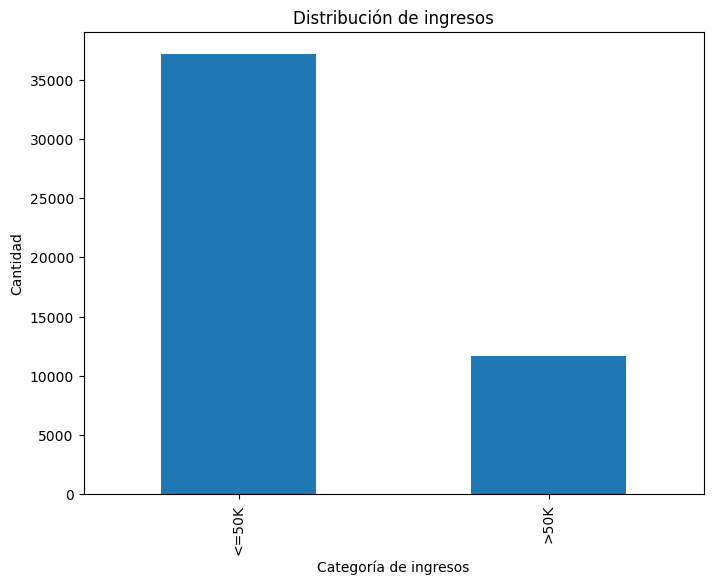

In [7]:
# Análisis exploratorio de datos
plt.figure(figsize=(8, 6))
data['income'].value_counts().plot(kind='bar')
plt.title('Distribución de ingresos')
plt.xlabel('Categoría de ingresos')
plt.ylabel('Cantidad')
plt.show()

# Visualizar la correlación entre variables numéricas
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
correlation_matrix = data[numeric_columns].corr()

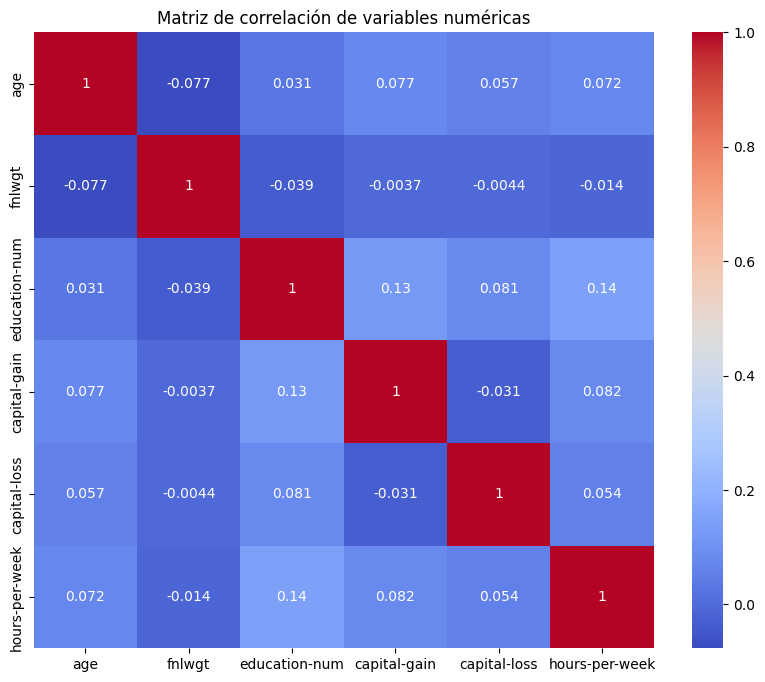

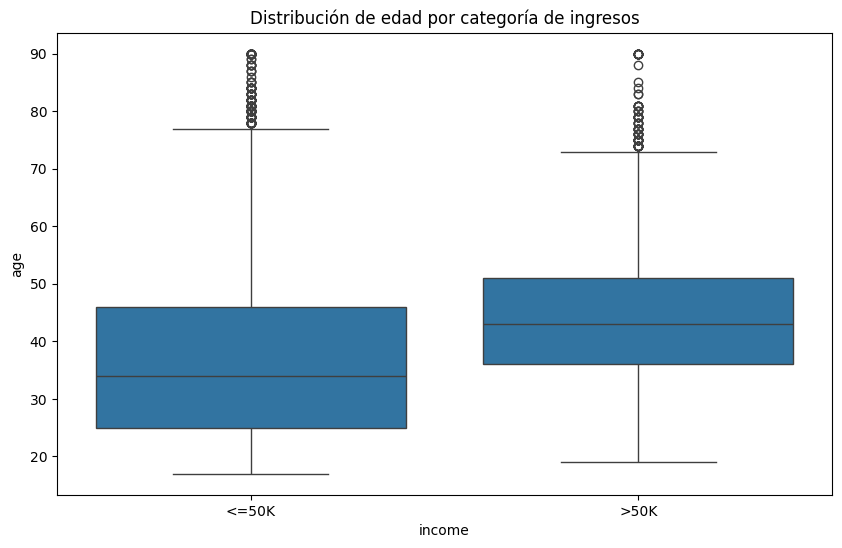

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de variables numéricas')
plt.show()

# Visualizar la distribución de edad por categoría de ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Distribución de edad por categoría de ingresos')
plt.show()

In [9]:
# Preprocesamiento de datos
# Codificar variables categóricas
data_encoded = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Codificar la variable objetivo
data_encoded['income'] = data_encoded['income'].map({'>50K': 1, '<=50K': 0})

# Separar características y variable objetivo
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Formas de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Formas de los conjuntos de datos:
X_train: (39073, 108)
X_test: (9769, 108)
y_train: (39073,)
y_test: (9769,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo de Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = lin_reg.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"R-cuadrado: {r2}")

Error cuadrático medio: 2.711406336994597e+19
R-cuadrado: -1.4820106780028433e+20


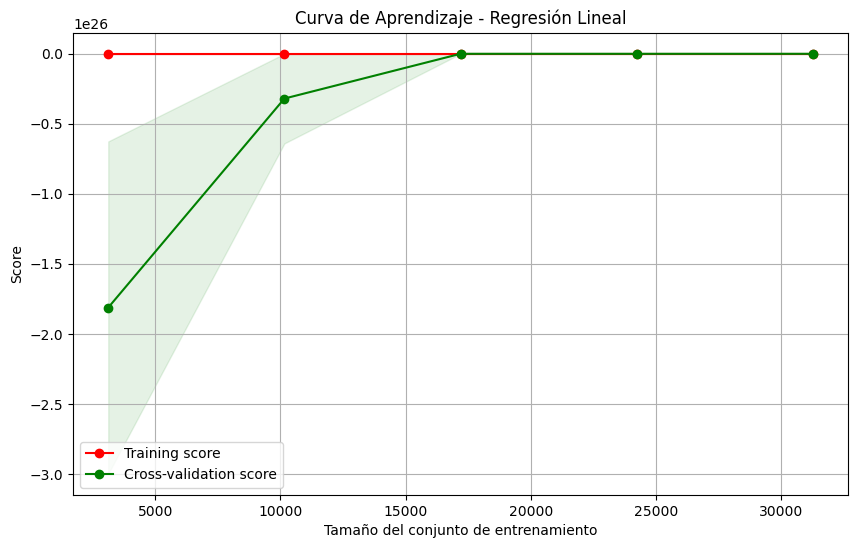

In [14]:
# Función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

# Graficar la curva de aprendizaje
plot_learning_curve(lin_reg, X_train_scaled, y_train, "Curva de Aprendizaje - Regresión Lineal")


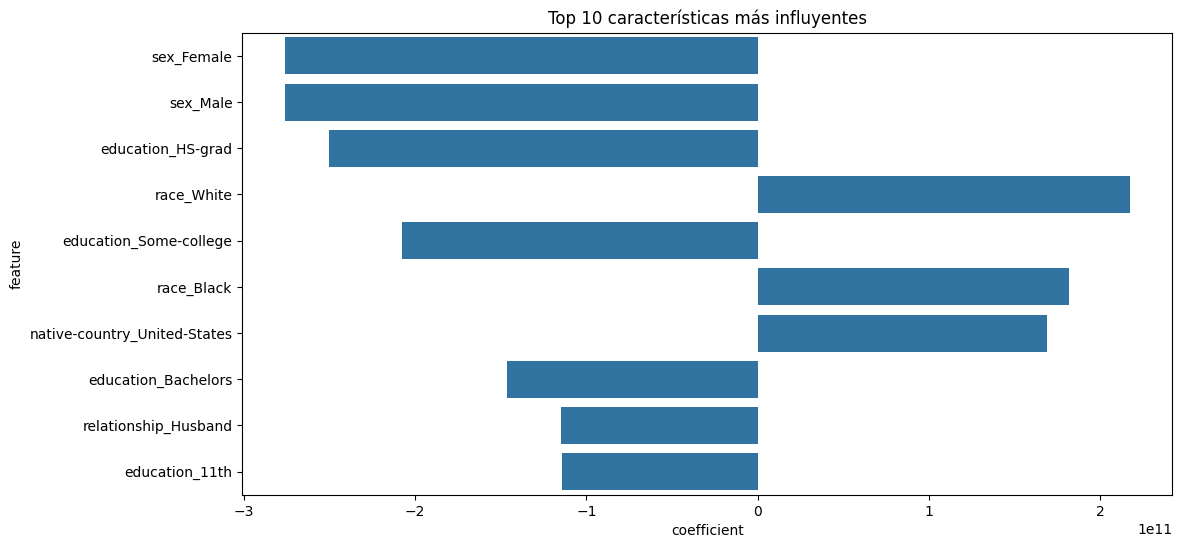

In [15]:
# Visualizar los coeficientes del modelo
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lin_reg.coef_})
coef_df = coef_df.sort_values('coefficient', key=abs, ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title('Top 10 características más influyentes')
plt.show()